#                               GRIP internship

# Task 02 : Prediction using Unsupervised ML

# By Pankaj Kumar Barman

### Target : from the given 'iris' dataset predict the optimal number of clasturs and represents it visually

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the data set
data = pd.read_csv("iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset = data.copy()

In [6]:
dataset.shape

(150, 6)



#### understand the Characteristics of data


In [7]:
# ---- DATA CHARACTERISTICS  ------------------------#
# Data Characteristics
def data_characteristics(dataset):
    # shape of the dataset
    print("Shape of the Dataset : {}".format(dataset.shape))
    print("Number of Columns in the Dataset : {}".format(dataset.shape[1]))
    print("Number of Rows in the Dataset : {}".format(dataset.shape[0]))
    print("-"*30)
    
    # Understanding the Number of Numeric and Categorical features in dataset
    numeric_features = dataset.select_dtypes(include = [np.number])
    categoric_features = dataset.select_dtypes(exclude = [np.number])
    print("Number of Numerical Features : {}".format(numeric_features.shape[1]))
    print("Number of Categorical Features : {}".format(categoric_features.shape[1]))
    print("-"*30)
    
    # Unique values
    print("No of unique values : {}".format(dataset.nunique()))
    print("-"*30)
    
    # Number of NOT NUll Values
    print("No of NON-NANS : {}".format(dataset.count()))
    print("-"*30)
    
    # Understanding the dataset
    print("Information of the Dataset : {}".format(dataset.info(verbose = False, memory_usage = "deep")))
    print("-"*30)
    
#------------------------------------------------------------------------------#

# dataset Characteristics
print(data_characteristics(dataset))


Shape of the Dataset : (150, 6)
Number of Columns in the Dataset : 6
Number of Rows in the Dataset : 150
------------------------------
Number of Numerical Features : 5
Number of Categorical Features : 1
------------------------------
No of unique values : Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64
------------------------------
No of NON-NANS : Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Columns: 6 entries, Id to Species
dtypes: float64(4), int64(1), object(1)
memory usage: 16.3 KB
Information of the Dataset : None
------------------------------
None


In [8]:
# Statistical Summary of the dataset
print("Statistical Summary of the Dataset : ")
dataset.describe(include = "all", percentiles = [.15, .25, .50, .75, .85]).transpose()

Statistical Summary of the Dataset : 


,count,unique,top,freq,mean,std,min,15%,25%,50%,75%,85%,max
Id,150,NaN,NaN,NaN,75.5,43.4454,1,23.35,38.25,75.5,112.75,127.65,150
SepalLengthCm,150,NaN,NaN,NaN,5.84333,0.828066,4.3,5,5.1,5.8,6.4,6.7,7.9
SepalWidthCm,150,NaN,NaN,NaN,3.054,0.433594,2,2.6,2.8,3,3.3,3.5,4.4
PetalLengthCm,150,NaN,NaN,NaN,3.75867,1.76442,1,1.435,1.6,4.35,5.1,5.6,6.9
PetalWidthCm,150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.2,0.3,1.3,1.8,2.065,2.5
Species,150,3,Iris-virginica,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checks for outliers if any

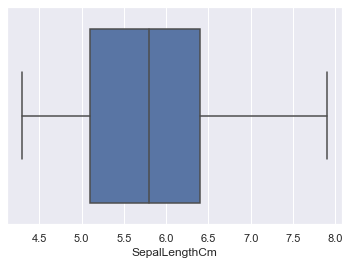

In [9]:
sns.boxplot(x = dataset["SepalLengthCm"])

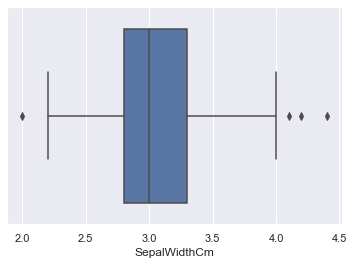

In [10]:
sns.boxplot(x = dataset["SepalWidthCm"])

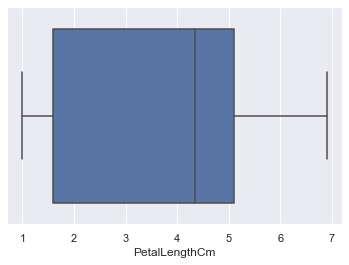

In [11]:
sns.boxplot(x = dataset["PetalLengthCm"])

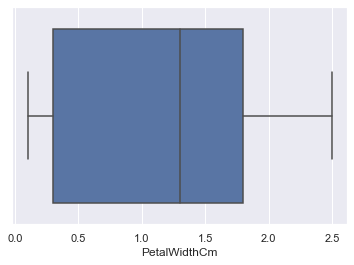

In [12]:
sns.boxplot(x = dataset["PetalWidthCm"])

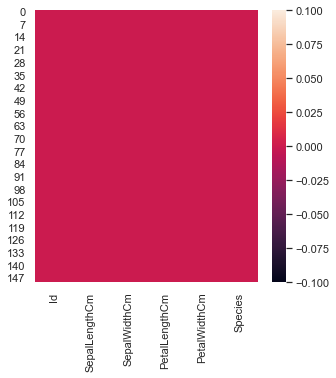

In [13]:
##check for missing values
plt.figure(figsize=(5,5))
sns.heatmap(dataset.isnull())

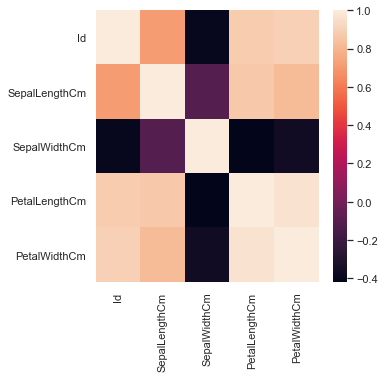

In [15]:
## find the corelation about the data set
plt.figure(figsize=(5,5))
sns.heatmap(dataset.corr())

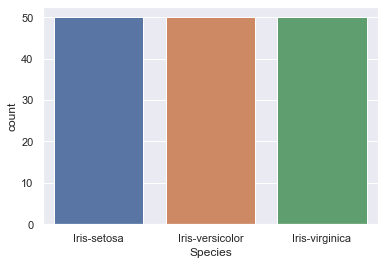

In [19]:
sns.countplot(x=dataset['Species'],saturation = 0.75)

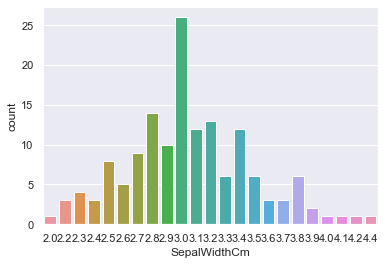

In [20]:
sns.countplot(x=dataset["SepalWidthCm"],saturation = 0.75)

In [21]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

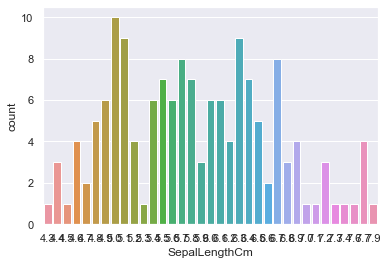

In [22]:
sns.countplot(x=dataset['SepalLengthCm'],saturation = 0.75)

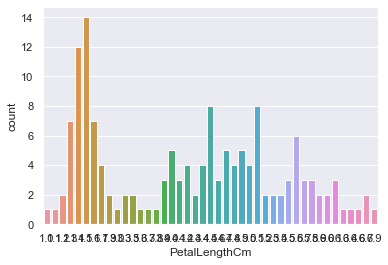

In [23]:
sns.countplot(x=dataset['PetalLengthCm'],saturation = 0.75)

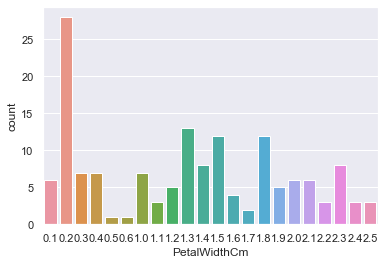

In [24]:
sns.countplot(x=dataset['PetalWidthCm'],saturation = 0.75)

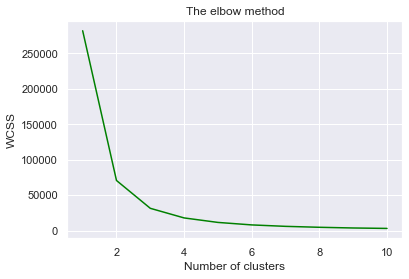

In [8]:
# Finding the optimum number of clusters for k-means classification

x = dataset.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph
plt.plot(range(1, 11), wcss,color='green')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [9]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0,n_jobs=None)
y_kmeans = kmeans.fit_predict(x)

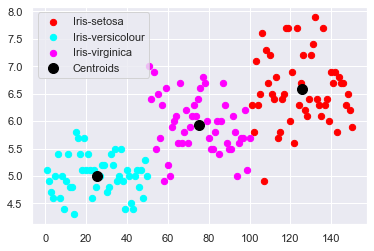

In [12]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],  s = 40, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],  s = 40, c = 'cyan', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],  s = 40, c = 'magenta', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()
plt.show()